
## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways/"
pages = 40
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df


,reviews
0,✅ Trip Verified | This time British Airways ...
1,"✅ Trip Verified | The seats were excellent, ..."
2,✅ Trip Verified | After the nightmare of get...
3,✅ Trip Verified | Prior to boarding a gate a...
4,✅ Trip Verified | I flew from Amsterdam to L...
...,...
3915,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...
3916,LHR to HAM. Purser addresses all club passenge...
3917,My son who had worked for British Airways urge...
3918,London City-New York JFK via Shannon on A318 b...


In [5]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

Reading Dataset

In [6]:
reviews = pd.read_csv("BA_reviews.csv")
reviews = reviews.pop('reviews')
reviews

,reviews
0,✅ Trip Verified | This time British Airways ...
1,"✅ Trip Verified | The seats were excellent, ..."
2,✅ Trip Verified | After the nightmare of get...
3,✅ Trip Verified | Prior to boarding a gate a...
4,✅ Trip Verified | I flew from Amsterdam to L...
...,...
3915,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...
3916,LHR to HAM. Purser addresses all club passenge...
3917,My son who had worked for British Airways urge...
3918,London City-New York JFK via Shannon on A318 b...


Cleaning Dataset

In [7]:
def romove_punctuvations(text):
  for punctuation in string.punctuation:
    text = text.replace(punctuation, '')
  return text

In [41]:
reviews = reviews.str.replace('Trip Verified |', '')
reviews = reviews.str.replace('Trip Verified', '')
reviews = reviews.str.replace('✅', '')
reviews = reviews.str.replace('|', '')
reviews = reviews.str.lower()
reviews = reviews.str.strip()
reviews = reviews.str.replace(r'\b(\w{1,3})\b', '')
reviews = reviews.apply(romove_punctuvations)
reviews

,reviews
0,this time british airways managed to get every...
1,the seats were excellent with a feel of much m...
2,after the nightmare of getting through triple ...
3,prior to boarding a gate agent seemed to pick ...
4,i flew from amsterdam to las vegas with a layo...
...,...
3915,lhrhkg on boeing 747 230812 much has been wri...
3916,lhr to ham purser addresses all club passenger...
3917,my son who had worked for british airways urge...
3918,london citynew york jfk via shannon on a318 bu...


In [44]:
reviews.shape

(3920,)

In [45]:
freq_words = pd.Series(' '.join(reviews).split()).value_counts()[:50]
freq_words

,count
the,31784
to,21253
and,19527
a,14413
was,13890
i,11667
of,9120
in,8973
on,8429
flight,7112


<ipython-input-46-7ac51daa9538>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  freq_words.plot.barh(x=freq_words[0],y=freq_words[1])


<function matplotlib.pyplot.show(close=None, block=None)>

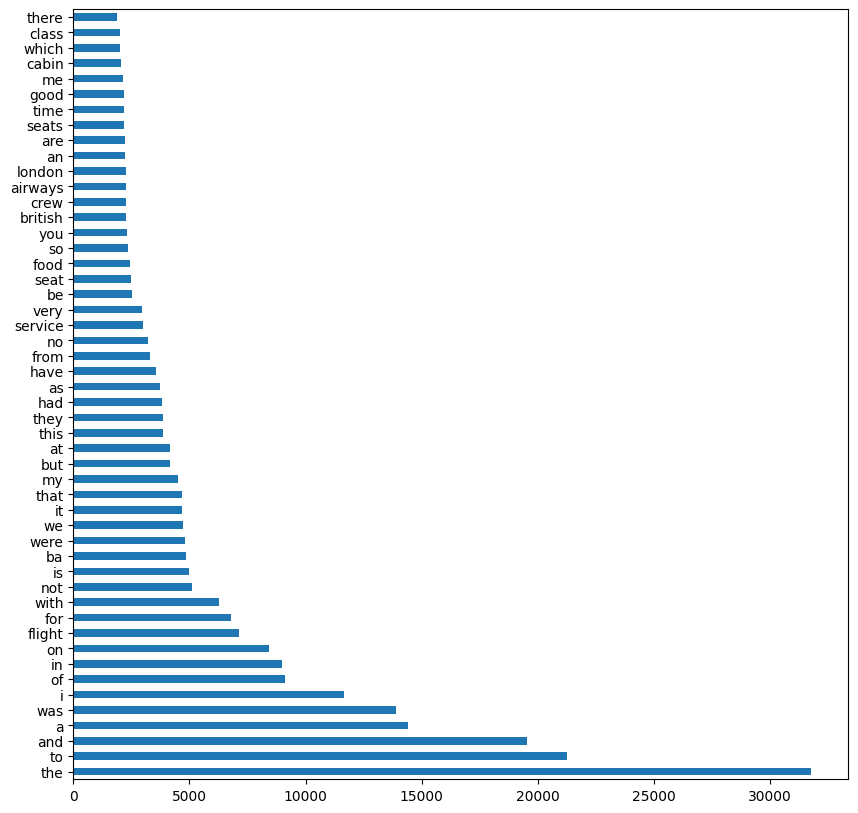

In [46]:
plt.figure(figsize=(10,10))
freq_words.plot.barh(x=freq_words[0],y=freq_words[1])
plt.show

Text Clustering

In [47]:
categoties = ['negative','positive']
num_cat = len(categoties)
num_cat

2

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
tf_idf_vect = TfidfVectorizer(lowercase=True, stop_words='english', ngram_range=(1,1), tokenizer=tokenizer.tokenize)
reviews_counts = tf_idf_vect.fit_transform(reviews)
reviews_counts.shape

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3920, 15838)

In [49]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=num_cat).fit(reviews_counts)
pred_labels = kmeans.labels_
pred_labels

array([0, 0, 1, ..., 1, 0, 0], dtype=int32)

In [50]:
cluster_centres = kmeans.cluster_centers_
cluster_centres

array([[2.53509151e-04, 5.51943672e-05, 5.09642524e-05, ...,
        5.07746632e-05, 7.32149452e-05, 0.00000000e+00],
       [3.73871612e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.44422050e-05]])

In [51]:
unique,counts = np.unique(pred_labels, return_counts=True)
dict(zip(unique, counts))

{0: 2698, 1: 1222}

In [52]:
from sklearn import metrics

# Compute DBI score
dbi = metrics.davies_bouldin_score(reviews_counts.toarray(), pred_labels)

# Compute Silhoutte Score
ss = metrics.silhouette_score(reviews_counts.toarray(), pred_labels, metric='euclidean')
# Print the DBI and Silhoutte Scores
print("DBI Score: ", dbi, "\nSilhoutte Score: ", ss)

DBI Score:  12.013908764675405 
Silhoutte Score:  0.006660810668978917


In [53]:
df_reviews = pd.DataFrame({"review": reviews, "label": pred_labels})
df_reviews.head()


,review,label
0,this time british airways managed to get every...,0
1,the seats were excellent with a feel of much m...,0
2,after the nightmare of getting through triple ...,1
3,prior to boarding a gate agent seemed to pick ...,0
4,i flew from amsterdam to las vegas with a layo...,1


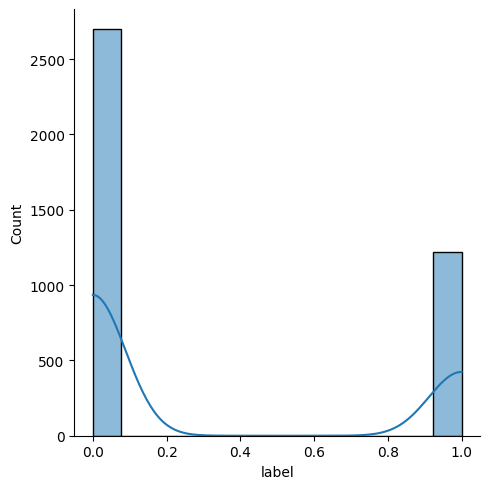

In [54]:
sns.displot(df_reviews['label'], kde=True)

In [58]:
positive_reviews = df_reviews[df_reviews['label'] == 1]
positive_reviews

,review,label
2,after the nightmare of getting through triple ...,1
4,i flew from amsterdam to las vegas with a layo...,1
7,terrible overall medium service and the flight...,1
11,i booked through ba because loganair don’t hav...,1
12,british airways lost bags in lhr then found th...,1
...,...,...
3880,on a recent vacation from sacramento to paris ...,1
3881,i should be in a nice hotel in romania instead...,1
3896,lanzarote to gatwick on 13th april flight itse...,1
3907,just got back from bridgetown barbados flying ...,1


In [57]:
Negative_reviews = df_reviews[df_reviews['label'] == 0]
Negative_reviews

,review,label
0,this time british airways managed to get every...,0
1,the seats were excellent with a feel of much m...,0
3,prior to boarding a gate agent seemed to pick ...,0
5,first the good news the club suites are such a...,0
6,i have never travelled with british airways be...,0
...,...,...
3914,this was a bmi regional operated flight on a r...,0
3915,lhrhkg on boeing 747 230812 much has been wri...,0
3916,lhr to ham purser addresses all club passenger...,0
3918,london citynew york jfk via shannon on a318 bu...,0
